# ###############
# REGRESSION PART
# ###############


1. IMPORT DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt

2. Define functions to calculate average like and comments

In [2]:
def get_average_like_count(posts: list):
    total = 0
    for post in posts:
        if post.get('like_count') is not None:
            total += post['like_count']
        else :
            total += 0
    if len(posts) == 0:
        return 0
    return total / len(posts)


def get_average_comment_count(posts: list):
    total = 0
    for post in posts:
        if post.get('comments_count') is not None:
            total += post['comments_count']
        else :
            total += 0
    if len(posts) == 0:
        return 0
    return total / len(posts)

3. Create training dataframe

In [3]:
post_train = []
post_test = []

with gzip.open('training-dataset.jsonl.gz', 'rt') as f:
    
    for line in f:
        sample = json.loads(line)

        profile = sample['profile']
        username = profile['username']

        posts = sample['posts']
        average_like_count = get_average_like_count(posts)
        average_comment_count = get_average_comment_count(posts)
        for p in posts:
            like_info = True
            post = {}
            post['post_id'] = p['id']
            post['username'] = username
            post['comments_count'] = p['comments_count']
            post['media_type'] = p['media_type']
            if p.get('like_count') is not None:
                post['like_count'] = p['like_count']
            else:
                like_info = False
                post['like_count'] = 0
            post['average_like_count_of_user'] = average_like_count
            post['average_comment_count_of_user'] = average_comment_count
            if p.get('caption') is not None:
                post['caption'] = p['caption']
            
            
            post['user_followers'] = profile['follower_count']
            post['user_following'] = profile['following_count']
            post['engagement_rate'] = average_like_count + average_comment_count / profile['follower_count']
            post['user_reels_count'] = profile['highlight_reel_count']

            if like_info:
                post_train.append(post)
            else:
                post_test.append(post)

In [4]:
len(post_train), len(post_test)

(183083, 4219)

In [5]:
post_train_df = pd.DataFrame(post_train)   
post_test_df = pd.DataFrame(post_test)

In [6]:
post_train_df.head()

,post_id,username,comments_count,media_type,like_count,average_like_count_of_user,average_comment_count_of_user,caption,user_followers,user_following,engagement_rate,user_reels_count
0,17990918969458720,deparmedya,0,IMAGE,6.0,11.542857,0.342857,Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷,1167,192,11.543151,6
1,18219250732221045,deparmedya,1,VIDEO,22.0,11.542857,0.342857,Oriflame Duologi Lansmanı #isveçtengelengüzell...,1167,192,11.543151,6
2,18311380465102328,deparmedya,0,VIDEO,19.0,11.542857,0.342857,#oriflameilesaçbakımdevrimi ✌️,1167,192,11.543151,6
3,18089518138361507,deparmedya,1,VIDEO,19.0,11.542857,0.342857,✌️#oriflameilesaçbakımdevrimi 07Agustos’23 ori...,1167,192,11.543151,6
4,18012743929758497,deparmedya,0,VIDEO,21.0,11.542857,0.342857,07 Agustos’23 #oriflameturkiye #duoloji,1167,192,11.543151,6


In [7]:
post_train_df.shape, post_test_df.shape

((183083, 12), (4219, 12))

In [8]:
post_train_df['caption'] = post_train_df['caption'].fillna('NaN')
post_test_df['caption'] = post_test_df['caption'].fillna('NaN')

4. Correlation matrix to see correlation between variables

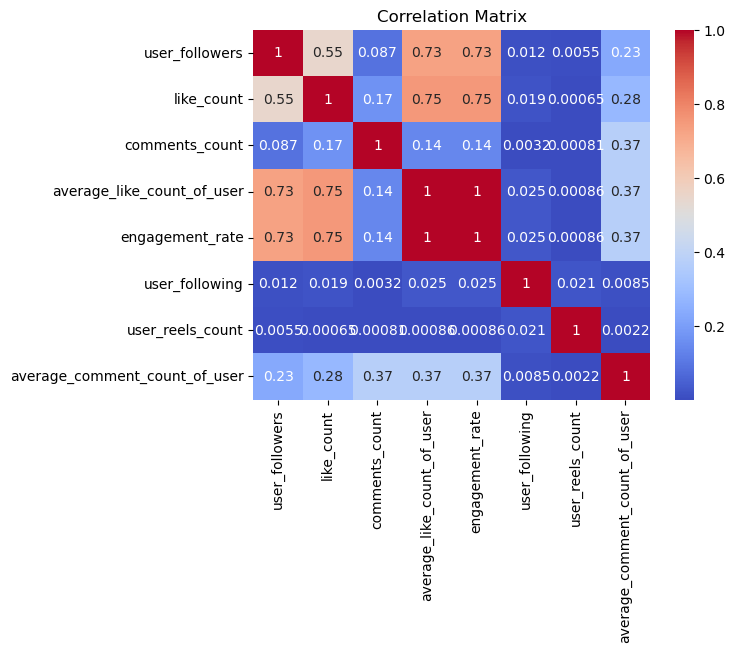

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = post_train_df[['user_followers', "like_count", "comments_count", "average_like_count_of_user", "engagement_rate","user_following", "user_reels_count", "average_comment_count_of_user"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

5. Scatter plots to see relation between varibles

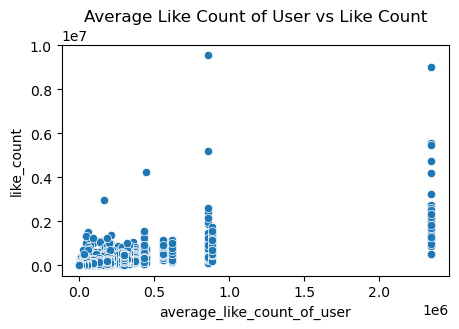

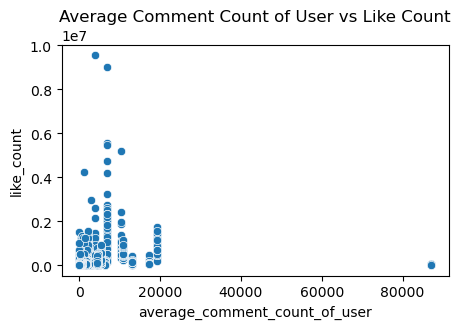

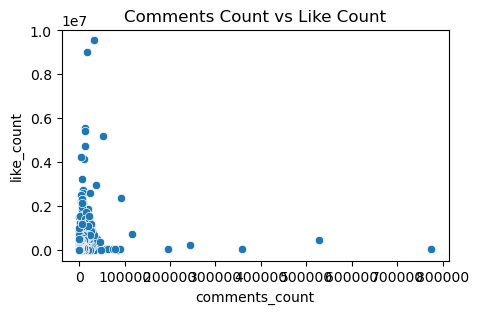

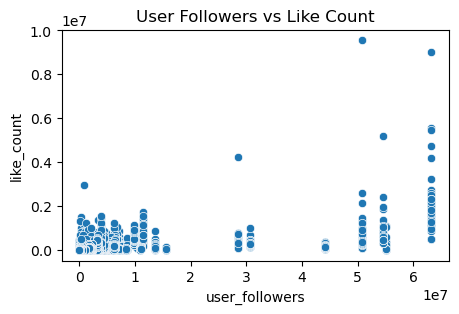

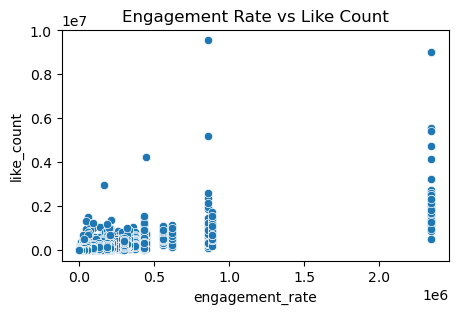

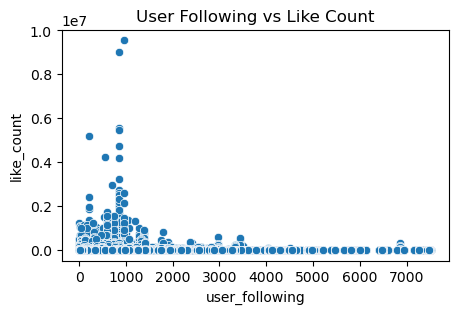

In [10]:
plt.figure(figsize=(5, 3))

sns.scatterplot(x='average_like_count_of_user', y='like_count', data=post_train_df)
plt.title("Average Like Count of User vs Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='average_comment_count_of_user', y='like_count', data=post_train_df)
plt.title("Average Comment Count of User vs Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='comments_count', y='like_count', data=post_train_df)
plt.title("Comments Count vs Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='user_followers', y='like_count', data=post_train_df)
plt.title("User Followers vs Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='engagement_rate', y='like_count', data=post_train_df)
plt.title("Engagement Rate vs Like Count")

plt.figure(figsize=(5, 3))
sns.scatterplot(x='user_following', y='like_count', data=post_train_df)
plt.title("User Following vs Like Count")
plt.show()


## 6. Definition of logarithmic variables

In [11]:
post_train_df['log_like'] = np.log1p(post_train_df['like_count'])
post_test_df['log_like'] = np.log1p(post_test_df['like_count'])

post_train_df['log_avg_like'] = np.log1p(post_train_df['average_like_count_of_user'])
post_test_df['log_avg_like'] = np.log1p(post_test_df['average_like_count_of_user'])

post_train_df['log_avg_comment'] = np.log1p(post_train_df['average_comment_count_of_user'])
post_test_df['log_avg_comment'] = np.log1p(post_test_df['average_comment_count_of_user'])

post_train_df['log_comments'] = np.log1p(post_train_df['comments_count'])
post_test_df['log_comments'] = np.log1p(post_test_df['comments_count'])

post_train_df['log_engage'] = np.log1p(post_train_df['engagement_rate'])
post_test_df['log_engage'] = np.log1p(post_test_df['engagement_rate'])

post_train_df['log10_engagement_rate'] = np.log10(post_train_df['engagement_rate'] + 0.00001)
post_test_df['log10_engagement_rate'] = np.log10(post_test_df['engagement_rate'] + 0.00001)

post_train_df['log_user_followers'] = np.log1p(post_train_df['user_followers'])
post_test_df['log_user_followers'] = np.log1p(post_test_df['user_followers'])

post_train_df['log_user_following'] = np.log1p(post_train_df['user_following'])
post_test_df['log_user_following'] = np.log1p(post_test_df['user_following'])

post_train_df['log2_user_following'] = np.log1p(post_train_df['log_user_following'])
post_test_df['log2_user_following'] = np.log1p(post_test_df['log_user_following'])

post_train_df['l_avg_like * l_avg_comment'] = post_train_df['log_avg_like'] * post_train_df['log_avg_comment']
post_test_df['l_avg_like * l_avg_comment'] = post_test_df['log_avg_like'] * post_test_df['log_avg_comment']


## 7. Scatter plots with logarithmic variables

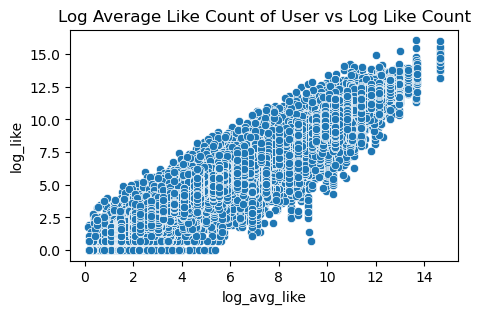

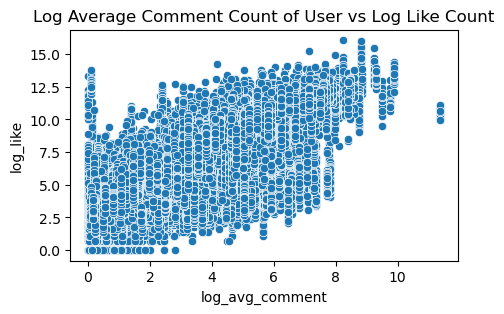

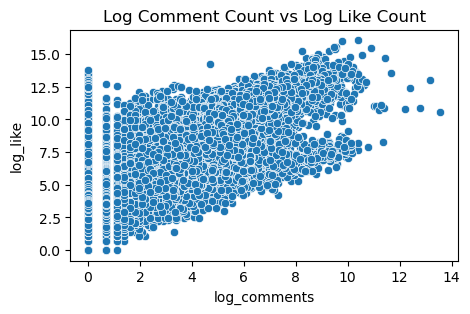

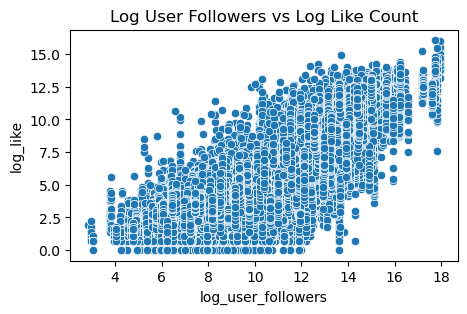

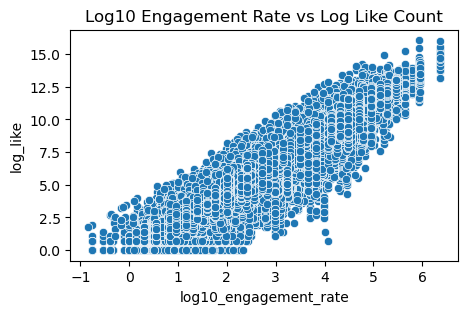

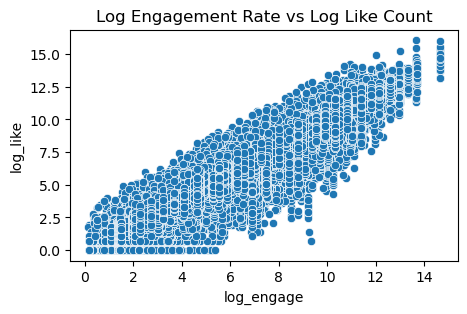

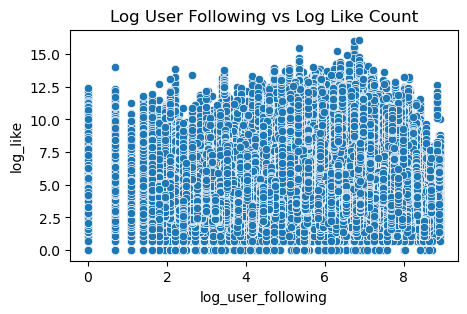

In [12]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_avg_like', y='log_like', data=post_train_df)
plt.title("Log Average Like Count of User vs Log Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_avg_comment', y='log_like', data=post_train_df)
plt.title("Log Average Comment Count of User vs Log Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_comments', y='log_like', data=post_train_df)
plt.title("Log Comment Count vs Log Like Count")

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_user_followers', y='log_like', data=post_train_df)
plt.title("Log User Followers vs Log Like Count")
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log10_engagement_rate', y='log_like', data=post_train_df)
plt.title("Log10 Engagement Rate vs Log Like Count")

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_engage', y='log_like', data=post_train_df)
plt.title("Log Engagement Rate vs Log Like Count")

plt.figure(figsize=(5, 3))
sns.scatterplot(x='log_user_following', y='log_like', data=post_train_df)
plt.title("Log User Following vs Log Like Count")
plt.show()


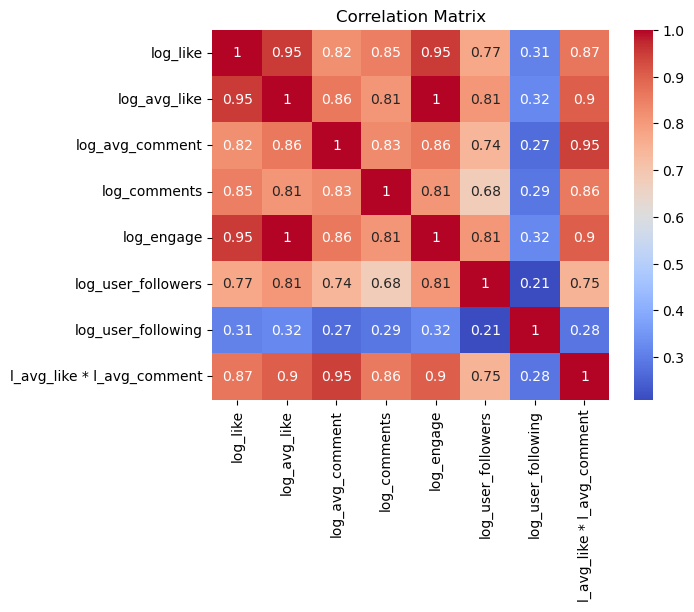

In [13]:
correlationMatrix = post_train_df[['log_like', 'log_avg_like', 'log_avg_comment', 'log_comments', 'log_engage', 'log_user_followers', 'log_user_following', 'l_avg_like * l_avg_comment']].corr()
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 8. Definition of x_train and y_train

In [14]:
feature_columns = ['log_avg_like', 'log_avg_comment', 'log_comments', 'log_engage', 'log_user_followers', 'log_user_following', 'l_avg_like * l_avg_comment']

In [15]:
# x_train = post_train_df[['log_avg_like', 'log_avg_comment', 'log_user_following']]
x_train = post_train_df[feature_columns]
y_train = post_train_df['log_like']
x_train.shape, y_train.shape

((183083, 7), (183083,))

In [16]:
x_train.shape

(183083, 7)

## Further preprocessing for train set (scaling and applying lof to remove outliers)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [18]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(x_train)
mask = yhat != -1
x_train, y_train = x_train[mask], y_train[mask]
x_train.shape, y_train.shape


((164775, 7), (164775,))

## 9. MODEL

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_train)



y_pred_transformed = np.expm1(y_pred)

y_train_transformed = np.expm1(y_train)

y_pred_transformed[np.where(y_pred_transformed < 0)] = 0

# y_pred_transformed = np.round(y_pred_transformed)

mse = mean_squared_error(y_train, y_pred_transformed)
lmse = mean_squared_log_error(y_train_transformed, y_pred_transformed)
print(f"Mean Squared Error: {mse}")
print(f"Log Mean Squared Error: {lmse}")
print("R2 Score: ", lr_model.score(x_train, y_train))
print("Coefficients: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)






Mean Squared Error: 621896205.6990095
Log Mean Squared Error: 0.39132191976562936
R2 Score:  0.9296166018415918
Coefficients:  [-5.89804894e+02 -2.61883749e-01  7.34066954e-01  5.91912467e+02
  9.48047175e-03 -1.65105858e-02 -2.14326971e-01]
Intercept:  4.812756256646193


## APPLYING CROSS VALIDATION

In [20]:
x_train = post_train_df[feature_columns]
y_train = post_train_df['log_like']

In [21]:

x_train = scaler.transform(x_train)



In [22]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold



cv_results = cross_validate(
    lr_model,
    x_train,
    y_train,
    cv=65,
    scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']
    
)

mse_scores = -cv_results['test_neg_mean_squared_error']
mae_scores = -cv_results['test_neg_mean_absolute_error']
r2_scores = cv_results['test_r2']

print("min max MSE scores for folds:", mse_scores.min(), mse_scores.max())
print("Average MSE:", mse_scores.mean())
print("min max R² scores for each fold:", r2_scores.min(), r2_scores.max())
print("Average R²:", r2_scores.mean())



min max MSE scores for folds: 0.2891059054053125 0.6146361667511161
Average MSE: 0.41025365856579943
min max R² scores for each fold: 0.8747961285542939 0.9580510163136314
Average R²: 0.9256162413178868


## CREATE TEST DATAFRAME FOR THAT ROUND

In [23]:
test_regress = []
with open('test-regression-round3.jsonl', 'r') as f:
    for line in f:
        test_regress.append(json.loads(line))

In [24]:
len(test_regress)

3000

In [25]:
for profile in test_regress:
    if profile['username'] in post_train_df['username'].values:
        profile['log_avg_like'] = post_train_df[post_train_df['username'] == profile['username']]['log_avg_like'].values[0]
        profile['log_avg_comment'] = post_train_df[post_train_df['username'] == profile['username']]['log_avg_comment'].values[0]
        profile['log_engage'] = post_train_df[post_train_df['username'] == profile['username']]['log_engage'].values[0]
        profile['log_user_followers'] = post_train_df[post_train_df['username'] == profile['username']]['log_user_followers'].values[0]
        profile['log_user_following'] = post_train_df[post_train_df['username'] == profile['username']]['log_user_following'].values[0]
        profile['l_avg_like * l_avg_comment'] = post_train_df[post_train_df['username'] == profile['username']]['l_avg_like * l_avg_comment'].values[0]
    elif profile['username'] in post_test_df['username'].values:
        profile['log_avg_like'] = post_test_df[post_test_df['username'] == profile['username']]['log_avg_like'].values[0]
        profile['log_avg_comment'] = post_test_df[post_test_df['username'] == profile['username']]['log_avg_comment'].values[0]
        profile['log_engage'] = post_test_df[post_test_df['username'] == profile['username']]['log_engage'].values[0]
        profile['log_user_followers'] = post_test_df[post_test_df['username'] == profile['username']]['log_user_followers'].values[0]
        profile['log_user_following'] = post_test_df[post_test_df['username'] == profile['username']]['log_user_following'].values[0]
        profile['l_avg_like * l_avg_comment'] = post_test_df[post_test_df['username'] == profile['username']]['l_avg_like * l_avg_comment'].values[0]

In [26]:
test_regress_df = pd.DataFrame(test_regress)

In [27]:
test_regress_df.head()

,caption,comments_count,id,media_type,media_url,timestamp,username,log_avg_like,log_avg_comment,log_engage,log_user_followers,log_user_following,l_avg_like * l_avg_comment
0,Ayvalık Belediyesi Kasım Ayı Olağan Meclis Top...,10,18299464882193238,CAROUSEL_ALBUM,https://scontent-sof1-2.cdninstagram.com/v/t51...,2023-11-01 12:43:50,mesuterginofficial,6.961838,3.142920,6.961839,9.887917,6.898715,21.880498
1,Olumsuz hava şartları sonucu ilçemizde ki sahi...,19,17870639199008459,VIDEO,None,2023-11-20 11:17:14,daricabelediyesi,5.292587,2.100644,5.292588,10.542706,4.110874,11.117839
2,"❝Bizler ki aynı kitaba baş eğmiş insanlarız, b...",22,17976060503438195,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t39...,2023-11-13 13:02:57,fikriyat,8.862338,3.529716,8.862338,13.148376,0.000000,31.281538
3,❤️,249,17980348256173250,CAROUSEL_ALBUM,https://scontent-sof1-1.cdninstagram.com/v/t51...,2023-07-31 10:31:17,obenalkan,10.495950,5.494589,10.495950,12.533374,6.988413,57.670928
4,"Değerlerimizin ışığında, dünyamıza iyi bakmak,...",0,18030944311530609,IMAGE,https://scontent-sof1-1.cdninstagram.com/v/t51...,2023-07-13 13:36:38,kaledehayat,4.565241,0.538997,4.565242,8.672486,2.397895,2.460649


In [28]:
test_regress_df.isnull().sum()

caption                       108
comments_count                  0
id                              0
media_type                      0
media_url                     206
timestamp                       0
username                        0
log_avg_like                    1
log_avg_comment                 1
log_engage                      1
log_user_followers              1
log_user_following              1
l_avg_like * l_avg_comment      1
dtype: int64

In [29]:
test_regress_df['log_comments'] = np.log1p(test_regress_df['comments_count'])

In [30]:

test_regress_df['log_avg_like'].fillna(0, inplace=True)
test_regress_df['log_comments'].fillna(0, inplace=True)
test_regress_df['log_avg_comment'].fillna(0, inplace=True)
test_regress_df['log_engage'].fillna(0, inplace=True)
test_regress_df['log_user_followers'].fillna(0, inplace=True)
test_regress_df['log_user_following'].fillna(0, inplace=True)
test_regress_df['l_avg_like * l_avg_comment'].fillna(0, inplace=True)


/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_52167/267924817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_regress_df['log_avg_like'].fillna(0, inplace=True)
/var/folders/fg/9flc738d345c3sdd8tq2cln80000gn/T/ipykernel_52167/267924817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [31]:
x_test = test_regress_df[feature_columns]
x_test.shape

(3000, 7)

In [32]:


# Check for NaN or infinite values
if np.any(np.isnan(x_test)):
    print("x_test contains NaN values.")
if np.any(np.isinf(x_test)):
    print("x_test contains infinite values.")

np.where(np.isinf(x_test))

(array([], dtype=int64), array([], dtype=int64))

In [33]:
x_test = scaler.transform(x_test)


In [34]:
y_pred = lr_model.predict(x_test)
y_pred_transformed = np.expm1(y_pred)
y_pred_transformed[np.where(y_pred_transformed < 0)] = 0
test_regress_df['predicted_like_count'] = y_pred_transformed

In [35]:
test_regress_df[['id', 'predicted_like_count']].head()



output = dict()

for index, row in test_regress_df.iterrows():
    output[row['id']] = row['predicted_like_count']


with open('prediction-regression-round3.json', 'w') as f:
    json.dump(output, f, indent=4)